In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

from tools.Forward import ForwardFlight, Plots

In [54]:
b = 3 ; c = 0.15
omega_air = 1050*np.pi/30 # forward omega
omega_climb = 1150*np.pi/30
omega_water = 25*np.pi/30
total_vol = 0.01     ; total_mass = 35 # kg
W = total_mass*9.8
a = 2*np.pi ; c_d = 0.1
R = 0.9
R_co = 0.3

A = np.pi*(R**2)
ro = 1.225

def rd(val):
    return round(val, 3)
def deg(val):
    return rd(val*180/np.pi)
def rad(val):
    return rd(val*np.pi/180)
pitch_forward = (rad(14), rad(2), rad(-7.8))
pitch_climb = (rad(14), rad(-.01), rad(0))
linear_twist = -0.05
forward_vel_air = 100 * 5/18 # m/s
forward_vel_water = 0.5

climb_vel_air = 3
climb_vel_water = 0.5
# Induced Vel from Applying Momentum Theory on Forward Flight

In [55]:
print(rd(omega_air*R_co - forward_vel_air) , '; Tip Mach =',rd(omega_air*R/340))

5.209 ; Tip Mach = 0.291


In [56]:
rotor = ForwardFlight(pitch=pitch_forward, pitch_climb = pitch_climb, twist=linear_twist, 
                      forward_vel=forward_vel_air, climb_vel= climb_vel_air,
                      no_of_blades=b,chord =c, omega_forward=omega_air, omega_climb=omega_climb,
                      lift_slope=a,drag_coeff=c_d,radius=R, root_cutouts=R_co, mass=total_mass
                      )

In [57]:
for si in np.linspace(0, 2*np.pi, 120):
    for r in np.linspace(R_co, R, 4):
        rotor.AoA_sectional(si,r)
        if rotor.induced_vel > 5 or rotor.induced_vel < 0:
            print(rd(rotor.induced_vel), end= ' ')
# So very few points are even >5, these are the points that were blowing up so I had to contain them.(You see what I mean in the AoA_sectional function inside ForwardFlight Class)

12.691 12.671 12.601 12.479 12.308 12.089 11.825 11.518 11.173 10.793 10.382 14.754 14.549 10.294 10.707 11.091 11.442 11.756 12.028 12.257 12.44 12.574 12.658 12.691 

In [58]:
print('Climb Thrust', rotor.T_climb())
print('Thrust',rd(rotor.T()))
print('Induced, Forward',rd(rotor.induced_vel), rd(forward_vel_air))
print('Conning Angle', deg(rotor.beta_0))

Climb Thrust 381.4659


Thrust 536.144
Induced, Forward 12.691 27.778
Conning Angle 1.638


In [59]:
print(rd(rotor.Torque()), rd(rotor.Torque_i()))
print('--'*5)
print('Roll:', rd(rotor.RollMomentHub()) , ' Pitch:',  rd(rotor.PitchMomentHub()))

88.944 30.556
----------
Roll: 0.416  Pitch: 0.532


In [60]:
print('Roll Climb:', rd(rotor.Roll_climb()) , ' Pitch Climb:',  rd(rotor.Pitch_climb()))

Roll Climb: -0.0  Pitch Climb: 0.402


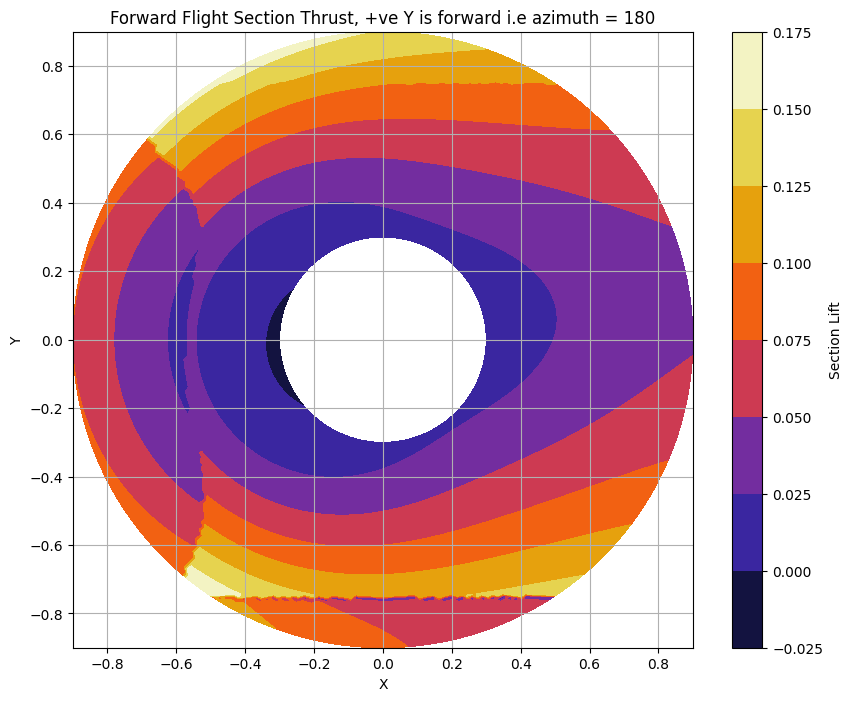

In [62]:
# Define the range of azimuthal angles and radii
azimuth_range = np.linspace(0, 2 * np.pi, 360)  ; radius_range = np.linspace(R_co, R, 60)  
dsi = azimuth_range[1] - azimuth_range[0]; dr = radius_range[1] - radius_range[0]
azimuth, radius = np.meshgrid(azimuth_range, radius_range)
lift_contour = np.copy(azimuth) ; x = np.copy(azimuth); y = np.copy(azimuth)
for i in range(60):
    for j in range(360):
        lift_contour[i][j] = rotor.dL(azimuth[i][j], radius[i][j])*dsi*dr  # Replace with your actual function
        x[i][j] = radius[i][j] * np.cos(azimuth[i][j] - np.pi/2)
        y[i][j] = radius[i][j] * np.sin(azimuth[i][j] - np.pi/2)
        # I wanted to represent it in the body frame x, y axis
plt.figure(figsize=(10, 8))
contour = plt.contourf(x, y, lift_contour, cmap='CMRmap')  # Adjust the colormap as needed
plt.colorbar(contour, label='Section Lift')  # Add a colorbar
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Forward Flight Section Thrust, +ve Y is forward i.e azimuth = 180')
# plt.gca().set_aspect('equal')  
plt.grid(True)
plt.show()

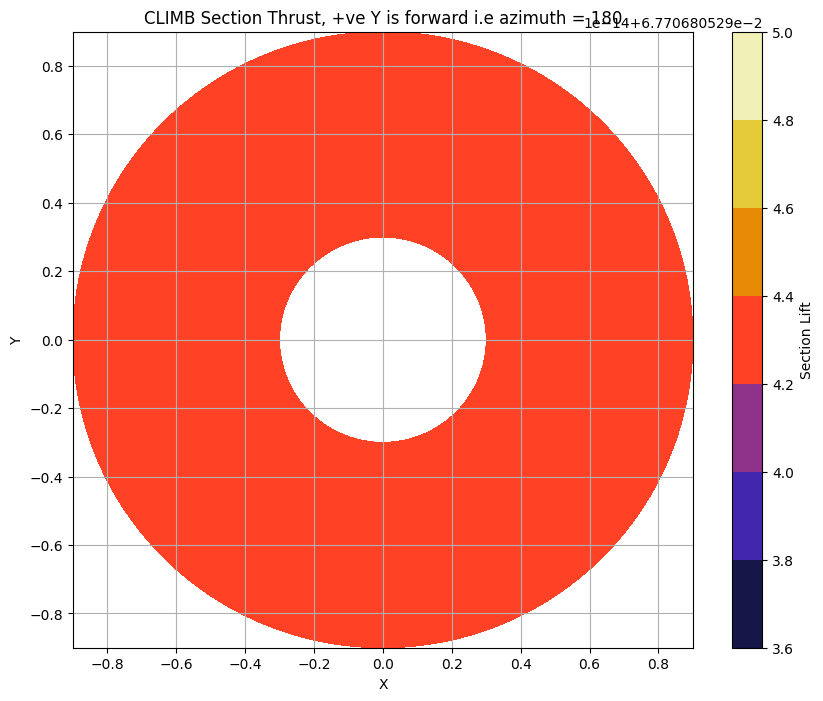

In [63]:
# Define the range of azimuthal angles and radii
azimuth_range = np.linspace(0, 2 * np.pi, 360)  ; radius_range = np.linspace(R_co, R, 60)  
dsi = azimuth_range[1] - azimuth_range[0]; dr = radius_range[1] - radius_range[0]
azimuth, radius = np.meshgrid(azimuth_range, radius_range)
lift_contour = np.copy(azimuth) ; x = np.copy(azimuth); y = np.copy(azimuth)
for i in range(60):
    for j in range(360):
        lift_contour[i][j] = rotor.dT_climb(azimuth[i][j])*dr  # Replace with your actual function
        x[i][j] = radius[i][j] * np.cos(azimuth[i][j] - np.pi/2)
        y[i][j] = radius[i][j] * np.sin(azimuth[i][j] - np.pi/2)
        # I wanted to represent it in the body frame x, y axis
plt.figure(figsize=(10, 8))
contour = plt.contourf(x, y, lift_contour, cmap='CMRmap')  # Adjust the colormap as needed
plt.colorbar(contour, label='Section Lift')  # Add a colorbar
plt.xlabel('X')
plt.ylabel('Y')
plt.title('CLIMB Section Thrust, +ve Y is forward i.e azimuth = 180')
# plt.gca().set_aspect('equal')  
plt.grid(True)
plt.show()
# Looking at the graph I think I need switch from BE to BEM theory for hover.

In [11]:
# Huge problem if omega*R_co is less than V_infi.
# Not just reversed flow, but at some point along the radius, U_T =0 and blows up AoA.
# So decided to increase RPM and root so AoA is in reasonable range which is still pretty high sometimes.
si = np.linspace(0, 2*np.pi, 360)
r = np.linspace(R_co, R, 25)
val = 16; i =0
for azi in si:
    for ra in r:
        if abs(rotor.AoA_sectional(azi,ra)) > rad(val):
            print('Violated at', deg(azi), rd(ra), '->', deg(rotor.AoA_sectional(azi,ra)) )
        else:
            i =1
if i ==1:
    print('AoA everywhere is <', val)

AoA everywhere is < 16


In [13]:
a_TPP = rotor.a_TPP
bodyDrag = 0.5*ro*(forward_vel_air**2)*(np.power(0.01,2/3)+ b*(R- R_co)*c*np.sin(a_TPP))*1.28
print(rd(bodyDrag), 'Drag from flat plate estimation') # Get this estimation cross verified
print(W, 'Weight of the helicopter')
print('--'*5)
print(deg(a_TPP),'Tip Path Plane Angle')
print(rd(rotor.T()*np.sin(a_TPP)), 'Thrust in longitudinal direction')
print(rd(rotor.T()*np.cos(a_TPP)), 'Thrust in Vertical direction')

37.961 Drag from flat plate estimation
343.0 Weight of the helicopter
----------
3.469 Tip Path Plane Angle
32.438 Thrust in longitudinal direction
535.162 Thrust in Vertical direction


In [14]:
# updated_pitch_angles = (14*np.pi/180, 0.5*np.pi/180, -6*np.pi/180)
updated_pitch_angles = pitch_forward
plotting = Plots(rotor, default_pitch=updated_pitch_angles)

In [15]:
x_t, y_t = plotting.plot('Thrust', 'tita')
x_r, y_r = plotting.plot('RollMoment', 'tita')
x_p, y_p = plotting.plot('PitchMoment', 'tita')

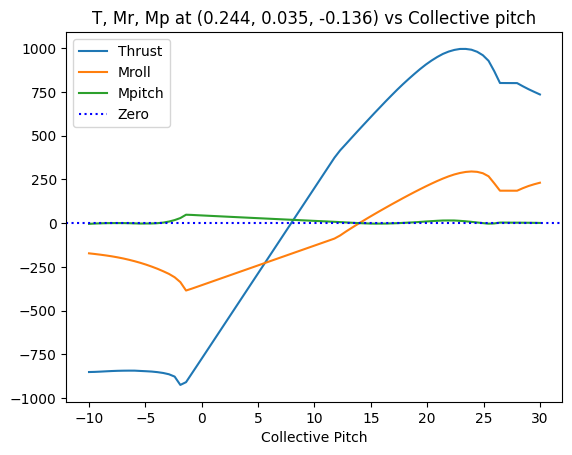

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_t * 180 / np.pi, y_t, label='Thrust')
ax.plot(x_r * 180 / np.pi, y_r, label='Mroll')
ax.plot(x_p * 180 / np.pi, y_p, label='Mpitch')

# Add a different colored dotted line at y=0
ax.axhline(0, color='b', linestyle=':', label='Zero')
ax.legend()
plt.title(f'T, Mr, Mp at {updated_pitch_angles} vs Collective pitch')
plt.xlabel('Collective Pitch')
plt.show()

In [16]:
# Roll and Pitch Moments w.r.t Cylic Pitches
x_r_1c, y_r_1c = plotting.plot('RollMoment', 'tita_1c')
x_r_1s, y_r_1s= plotting.plot('RollMoment', 'tita_1s')

x_p_1c, y_p_1c = plotting.plot('PitchMoment', 'tita_1c')
x_p_1s, y_p_1s= plotting.plot('PitchMoment', 'tita_1s')

In [17]:
x_q, y_q = plotting.plot('Torque', 'tita')

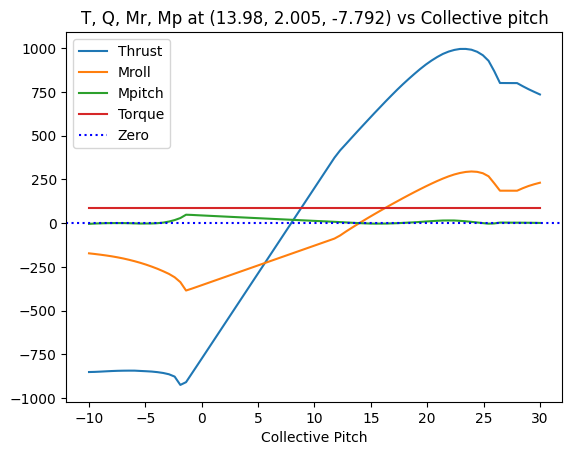

In [18]:
fig, ax = plt.subplots()
ax.plot(x_t * 180 / np.pi, y_t, label='Thrust')
ax.plot(x_r * 180 / np.pi, y_r, label='Mroll')
ax.plot(x_p * 180 / np.pi, y_p, label='Mpitch')
ax.plot(x_q  *180/np.pi, y_q, label = 'Torque')

# Add a different colored dotted line at y=0
ax.axhline(0, color='b', linestyle=':', label='Zero')
ax.legend()
angels =( deg(updated_pitch_angles[0]), deg(updated_pitch_angles[1]), deg(updated_pitch_angles[2]) )
plt.title(f'T, Q, Mr, Mp at {angels} vs Collective pitch')
plt.xlabel('Collective Pitch')
plt.show()

In [19]:
x_t_1c, y_t_1c = plotting.plot('Thrust', 'tita_1c')
x_t_1s, y_t_1s= plotting.plot('Thrust', 'tita_1s')
x_q_1c, y_q_1c = plotting.plot('Torque', 'tita_1c')
x_q_1s, y_q_1s = plotting.plot('Torque', 'tita_1s')

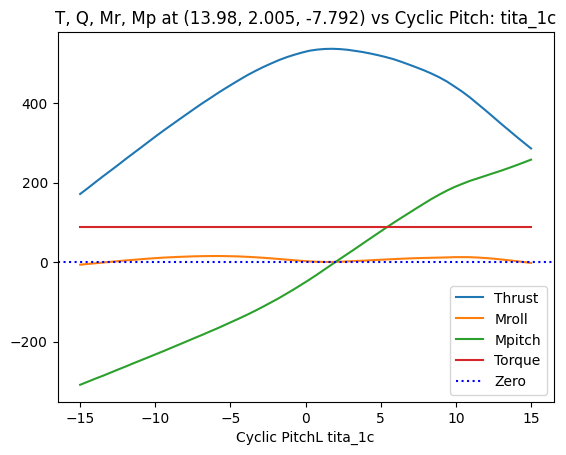

In [20]:
fig, ax = plt.subplots()
ax.plot(x_t_1c * 180 / np.pi, y_t_1c, label='Thrust')
ax.plot(x_r_1c * 180 / np.pi, y_r_1c, label='Mroll')
ax.plot(x_p_1c * 180 / np.pi, y_p_1c, label='Mpitch')
ax.plot(x_q_1c * 180/np.pi, y_q_1c,   label = 'Torque')

# Add a different colored dotted line at y=0
ax.axhline(0, color='b', linestyle=':', label='Zero')
ax.legend()
angels =( deg(updated_pitch_angles[0]), deg(updated_pitch_angles[1]), deg(updated_pitch_angles[2]) )
plt.title(f'T, Q, Mr, Mp at {angels} vs Cyclic Pitch: tita_1c')
plt.xlabel('Cyclic PitchL tita_1c')
plt.show()

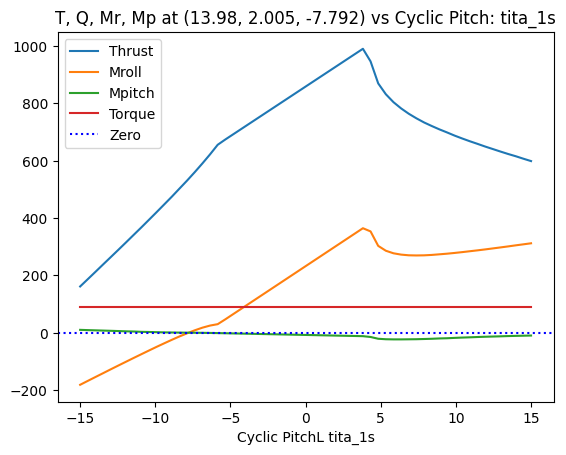

In [21]:
fig, ax = plt.subplots()
ax.plot(x_t_1s * 180 / np.pi, y_t_1s, label='Thrust')
ax.plot(x_r_1s * 180 / np.pi, y_r_1s, label='Mroll')
ax.plot(x_p_1s * 180 / np.pi, y_p_1s, label='Mpitch')
ax.plot(x_q_1s * 180/np.pi, y_q_1s,   label = 'Torque')

# Add a different colored dotted line at y=0
ax.axhline(0, color='b', linestyle=':', label='Zero')
ax.legend()
angels =( deg(updated_pitch_angles[0]), deg(updated_pitch_angles[1]), deg(updated_pitch_angles[2]) )
plt.title(f'T, Q, Mr, Mp at {angels} vs Cyclic Pitch: tita_1s')
plt.xlabel('Cyclic PitchL tita_1s')
plt.show()

In [90]:
pitch_forward_water = (rad(5.7), rad(-1.3), rad(-.3))
c_d_water = 0.15
omega_water = 150*np.pi/30
omega_climb_water = 125*np.pi/30
pitch_climb_water = (rad(8), rad(1), rad(-1))
rotor_water = ForwardFlight(pitch=pitch_forward_water, pitch_climb = pitch_climb_water, twist=linear_twist, 
                      forward_vel=forward_vel_water, climb_vel= climb_vel_water,
                      no_of_blades=b,chord =c, omega_forward=omega_water, omega_climb=omega_climb_water,
                      lift_slope=a,drag_coeff=c_d_water,radius=R, root_cutouts=R_co, mass=total_mass,
                      a_TPP= rad(10),
                      medium='water'
                      )

In [91]:
rotor_water.T_climb()

344.20028

In [80]:
T = rotor_water.T() 
T, T*np.sin(rotor_water.a_TPP), T*np.cos(rotor_water.a_TPP)

(961.8865589950871, 167.47227736294715, 947.1952220584081)

In [ ]:
rd(rotor_water.RollMomentHub()), rd(rotor_water.PitchMomentHub())

In [ ]:
water_plot = Plots(rotor_water, pitch_forward_water)

In [245]:
x_t, y_t = water_plot.plot('Thrust', 'tita')
x_t_1c, y_t_1c = water_plot.plot('Thrust', 'tita_1c')
x_t_1s, y_t_1s = water_plot.plot('Thrust', 'tita_1s')

KeyboardInterrupt: 

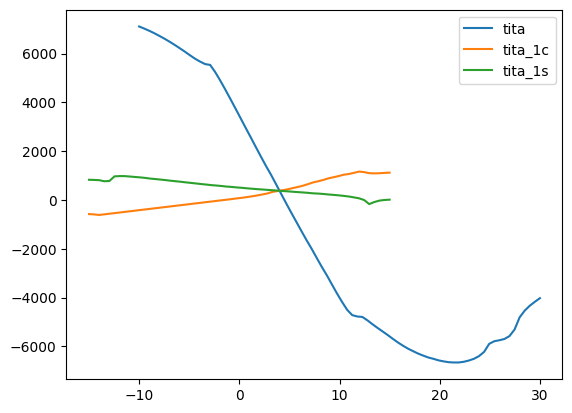

In [ ]:
plt.plot(x_t*180/np.pi, y_t      ,label = 'tita')
plt.plot(x_t_1c*180/np.pi, y_t_1c,label = 'tita_1c')
plt.plot(x_t_1s*180/np.pi, y_t_1s,label = 'tita_1s')
plt.legend()

In [247]:
x_r, y_r = water_plot.plot('RollMoment', 'tita')
x_p, y_p = water_plot.plot('PitchMoment', 'tita')

In [248]:
x_r_1c, y_r_1c = water_plot.plot('RollMoment', 'tita_1c')
x_r_1s, y_r_1s = water_plot.plot('RollMoment', 'tita_1s')
x_p_1c, y_p_1c = water_plot.plot('PitchMoment', 'tita_1c')
x_p_1s, y_p_1s = water_plot.plot('PitchMoment', 'tita_1s')

Text(0.5, 1.0, 'Roll')

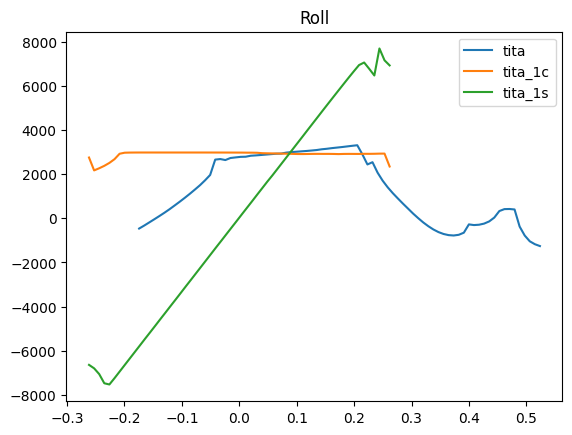

In [251]:
plt.plot(x_r,y_r, label = 'tita')
plt.plot(x_r_1c, y_r_1c, label = 'tita_1c')
plt.plot(x_r_1s, y_r_1s, label = 'tita_1s')
plt.legend()
plt.title('Roll')

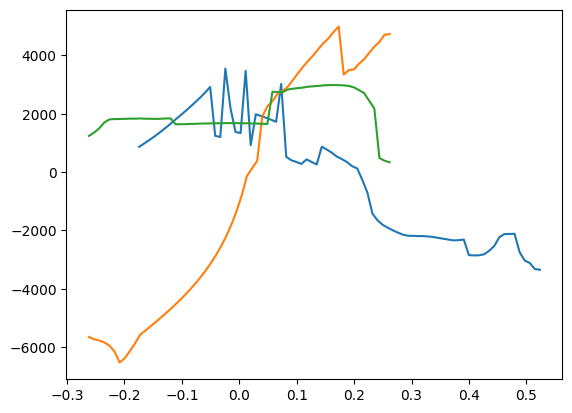

In [250]:
plt.plot(x_p,y_p, label = 'tita')
plt.plot(x_p_1c, y_p_1c, label = 'tita_1c')
plt.plot(x_p_1s, y_p_1s, label = 'tita_1s')

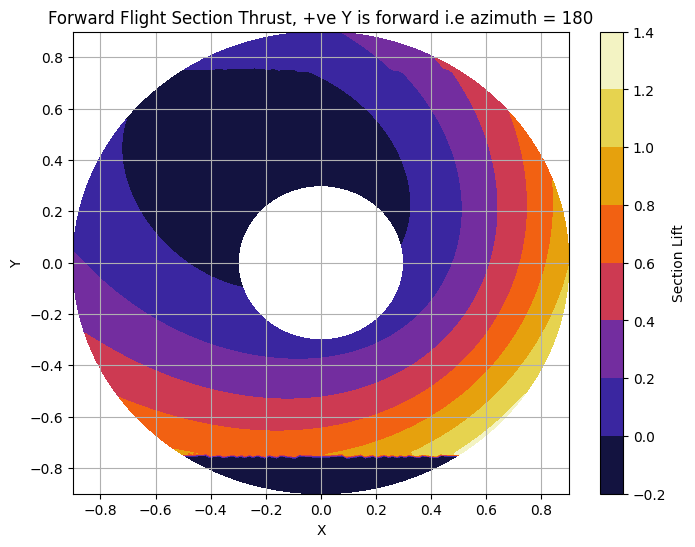

In [ ]:
# Define the range of azimuthal angles and radii
azimuth_range = np.linspace(0, 2 * np.pi, 360)  ; radius_range = np.linspace(R_co, R, 60)  
dsi = azimuth_range[1] - azimuth_range[0]; dr = radius_range[1] - radius_range[0]
azimuth, radius = np.meshgrid(azimuth_range, radius_range)
lift_contour = np.copy(azimuth) ; x = np.copy(azimuth); y = np.copy(azimuth)
for i in range(60):
    for j in range(360):
        lift_contour[i][j] = rotor_water.dL(azimuth[i][j], radius[i][j])*dsi*dr  # Replace with your actual function
        x[i][j] = radius[i][j] * np.cos(azimuth[i][j] - np.pi/2)
        y[i][j] = radius[i][j] * np.sin(azimuth[i][j] - np.pi/2)
        # I wanted to represent it in the body frame x, y axis
plt.figure(figsize=(8, 6))
contour = plt.contourf(x, y, lift_contour, cmap='CMRmap')  # Adjust the colormap as needed
plt.colorbar(contour, label='Section Lift')  # Add a colorbar
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Forward Flight Section Thrust, +ve Y is forward i.e azimuth = 180')
# plt.gca().set_aspect('equal')  
plt.grid(True)
plt.show()

In [65]:
rotor_water.T_climb()

NameError: name 'rotor_water' is not defined